# Task-4 To Explore Decision Tree Algorithm 
For the given ‘Iris’ dataset, creating the Decision Tree classifier and visualizing it graphically.

In [2]:
# importing required libraries
import pandas as pd
from sklearn import datasets
from sklearn import metrics

In [3]:
# Loading the iris dataset
iris=datasets.load_iris()

# Forming the iris dataframe
df=pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
# Information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [5]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Segregating the data**

In [6]:
#Separating the dataset into dependent and independent variables
array=df.values
X=array[ :,[0,1,2,3]]
y=iris.target

**Training the data**

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

**Implementation of Decision Tree Classifier**

In [8]:
from sklearn import tree
#Create Decision tree classifier
classifier=tree.DecisionTreeClassifier()

#Train Decision tree classifier
classifier.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

**Testing of data**

In [9]:
#Predict response for test dataset
y_pred_tree=classifier.predict(X_test)
print(y_pred_tree)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0]


In [10]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_tree))

Accuracy: 0.9777777777777777


**Visualization of data**

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


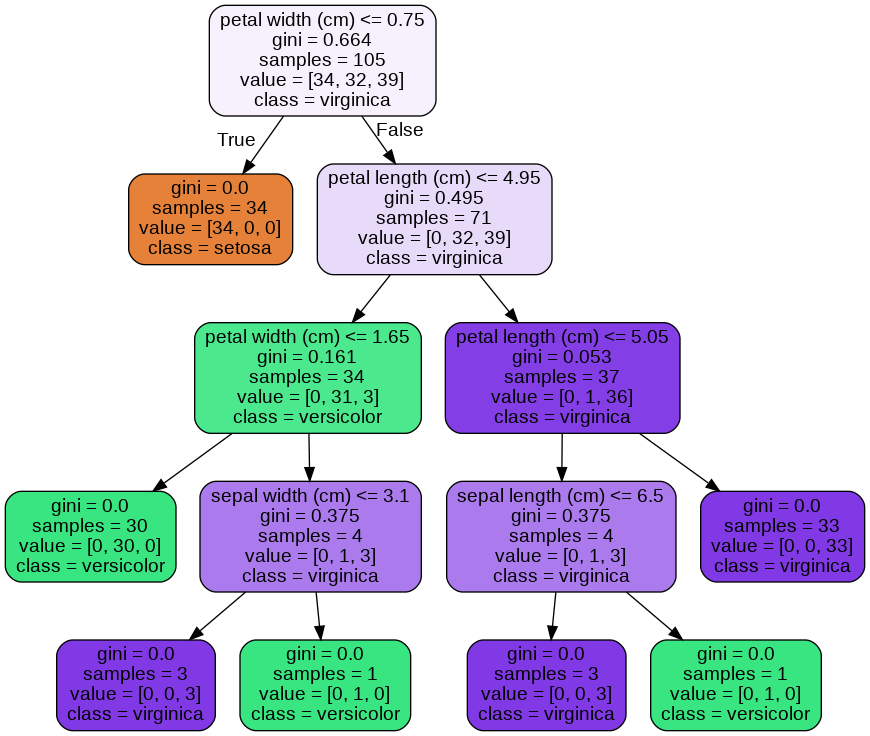

In [11]:
#Import required libraries for graphviz
from sklearn.externals.six import StringIO 
from sklearn.tree import export_graphviz
import pydot
from IPython.display import Image

#Visualize the graph
dot_data = StringIO()
export_graphviz(classifier , out_file=dot_data,feature_names=iris.feature_names,class_names=iris.target_names,filled=True, rounded=True)
(graph, ) = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())